На вход: цветное изображение
    
Свертка 5 фильтрами 3х3х3 (случайные числа), потом нормализация (коэффициенты и смещение произвольные), потом ReLU, потом MAX POOLING (2x2), потом попиксельный SoftMax.

Выход 5 каналов. 

In [1]:
import cv2
import numpy as np
import math
import random
from matplotlib import pyplot as plt
import torch

random.seed()

In [2]:
img = cv2.imread("me.jpg")

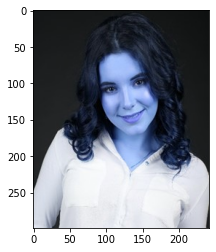

In [3]:
plt.imshow(img)

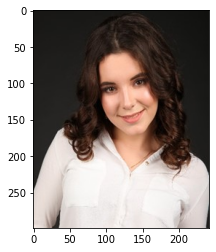

In [4]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
img.shape

(299, 242, 3)

Зададим количество фильтров

In [6]:
M = 5;

Зададим размер ядра свёртки:

In [7]:
R=3
S=3

Узнаем размер выходного изображения:

In [8]:
F=img.shape[0]-R+1
E=img.shape[1]-S+1

Количество каналов:

In [9]:
C=img.shape[2]

Выходной массив:

In [10]:
O = np.zeros((F,E,M))

Смещение: ???

In [11]:
B=np.zeros(M)

W=np.zeros((R,S,C,M))

Свёртка

In [12]:
for m in range (0,M):
     for i in range (0,R):
            for j in range (0,S):
                for k in range (0,C):
                    W[i,j,k,m]=random.randint(-5,5)
    
    
     for x in range (0,F):
        for y in range (0,E):
            O[x][y][m]=B[m]
            for i in range (0,R):
                for j in range (0,S):
                    for k in range (0,C):
                        O[x,y,m]+=img[x+i,y+j,k] * W[i,j,k,m]
            #O[m][x][y]=Activation(O[m][x][y])
O.shape

(297, 240, 5)

Нормализация

In [13]:
O.shape

(297, 240, 5)

In [14]:
#Среднее значение
mean=np.zeros(O.shape[2])
stddev=np.zeros(O.shape[2])
eps=0.000001
for k in range (0,O.shape[2]):
    for x in range (0,O.shape[0]):
        for y in range (0,O.shape[1]):
            mean[k]+=O[x,y,k]
    mean[k]/=(O.shape[0]*O.shape[1])
            
#Вариация
for k in range (0,O.shape[2]):
    for x in range (0,O.shape[0]):
        for y in range (0,O.shape[1]):
            stddev[k]+=pow((O[x,y,k]-mean[k]),2)
    stddev[k]/=(O.shape[0]*O.shape[1])
    
#Нормализация 
for k in range (0,O.shape[2]):
    for x in range (0,O.shape[0]):
        for y in range (0,O.shape[1]):
            O[x,y,k]=(O[x,y,k]-mean[k])/math.sqrt(stddev[k]+eps)

ReLU

In [15]:
for k in range (0,O.shape[2]):
    for x in range (0,O.shape[0]):
        for y in range (0,O.shape[1]):
            O[x,y,k]=max(0,O[x,y,k])
O.shape

(297, 240, 5)

Max pooling

In [16]:
stride=2
res=np.zeros((int(O.shape[0]/stride), int(O.shape[1]/stride), O.shape[2]), np.float32)
#res.shape

for k in range (0,res.shape[2]):
    for x in range (0,res.shape[0]):
        for y in range (0,res.shape[1]):
            i=stride*x
            j=stride*y
            res[x,y,k]=np.max(O[i:i+stride,j:j+stride,k])

Попиксельный softmax

In [19]:
exp=0.0
for k in range (0,res.shape[2]):
    for x in range (0,res.shape[0]):
        for y in range (0,res.shape[1]):
            exp+=np.exp(res[x,y,k])
            
for k in range (0,res.shape[2]):
    for x in range (0,res.shape[0]):
        for y in range (0,res.shape[1]):
            res[x,y,k]=np.exp(res[x,y,k])

array([[[ 2.5264225,  2.8108842,  1.       ,  1.0725797,  2.775886 ],
        [ 2.5264225,  2.8108842,  1.       ,  1.0725797,  2.775886 ],
        [ 2.5264225,  2.8108842,  1.       ,  1.0725797,  2.775886 ],
        ...,
        [ 2.770175 ,  3.002494 ,  1.       ,  1.0802691,  2.931882 ],
        [ 2.7249851,  3.0188873,  1.       ,  1.0751368,  2.9800823],
        [ 2.7249851,  3.0188873,  1.       ,  1.0751368,  2.9800823]],

       [[ 2.5264225,  2.7838063,  1.       ,  1.0649452,  2.7546666],
        [ 2.5264225,  2.7838063,  1.       ,  1.0649452,  2.7546666],
        [ 2.5264225,  2.7838063,  1.       ,  1.0649452,  2.7546666],
        ...,
        [ 2.770175 ,  3.002494 ,  1.       ,  1.0802691,  2.931882 ],
        [ 2.7249851,  3.0188873,  1.       ,  1.0751368,  2.9800823],
        [ 2.7249851,  3.0188873,  1.       ,  1.0751368,  2.9800823]],

       [[ 2.5016131,  2.7821229,  1.       ,  1.0649452,  2.7493868],
        [ 2.5016131,  2.7821229,  1.       ,  1.0649452,  2.

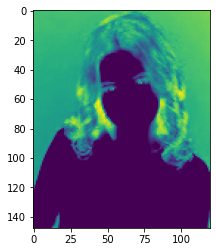

In [29]:
plt.imshow(res[:,:,1])